## To predict the Gender by First Name of person

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
col_name = ['First_Name', 'Gender', 'Value']                             ## Defining the column names
data = pd.read_csv('name_gender.csv', names = col_name, header = None)   ## Reading the dataset with defined column_names

In [3]:
data.head()

,First_Name,Gender,Value
0,Aaban,M,1.0
1,Aabha,F,1.0
2,Aabid,M,1.0
3,Aabriella,F,1.0
4,Aada,F,1.0


In [4]:
data.shape   ## Dimansion of the dataset

(95025, 3)

<AxesSubplot:xlabel='Gender', ylabel='count'>

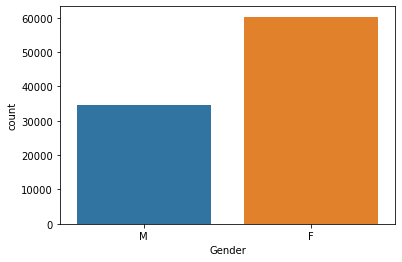

In [5]:
sns.countplot(data.Gender)      ## Counts of classes in gender

In [6]:
data.Gender.value_counts()     ## Showing counts of each Classes in Gender

F    60304
M    34721
Name: Gender, dtype: int64

In [7]:
len(data.First_Name.unique())

95025

#### From the above we see that all first names are unique names

In [8]:
data.Gender.replace({'F':1, 'M': 0}, inplace = True)    ## Replacing the values in Gender with numbers

In [9]:
data.head(3)

,First_Name,Gender,Value
0,Aaban,0,1.0
1,Aabha,1,1.0
2,Aabid,0,1.0


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
count_vec = CountVectorizer(analyzer='char')       

In [27]:
X = data['First_Name']
X_new = count_vec.fit(X)              ## Using Count_Vectorizer to initialize the term frequencies by characters of names

In [28]:
len(X_new.vocabulary_)                ## Vocab of 26 characters

26

In [29]:
X_matrix = X_new.transform(X)

In [30]:
data['First_Name'][0]

'Aaban'

In [31]:
X_matrix[0,:].toarray()

array([[3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]], dtype=int64)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
## Splitting data for validation

x_train, x_test, y_train, y_test = train_test_split(X_matrix, data.Gender, test_size = 0.3, random_state = 42)

In [34]:
from keras.utils import to_categorical

In [35]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [46]:
## Loading the model for validating

import pickle

loaded_model = pickle.load(open('model3.sav', 'rb'))

In [47]:
prediction = loaded_model.predict_classes(x_test)

In [48]:
from sklearn import metrics

In [49]:
metrics.confusion_matrix(y_test[:,1], prediction)

array([[ 6573,  3877],
       [ 2633, 15425]], dtype=int64)

In [50]:
acc = metrics.accuracy_score(y_test[:,1], prediction)
print(f'Accuracy: {(acc * 100) : .2f}%')           ## Using format specifier to print accuracy to 2 decimals.

Accuracy:  77.16%
